In [2]:
# First, install the wordcloud package
!pip install wordcloud

# Then import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [10]:
# Load CSV file (adjust path if needed)
df = pd.read_csv('twitter_training.csv')  # This is the main file in the dataset

# Show top 5 rows
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
# Dataset size
print("Shape:", df.shape)

# Info about columns
df.info()

# Unique sentiments
df['Borderlands'].value_counts()


Shape: (74681, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Borderlands
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)   

In [17]:
# Drop missing or empty text rows
df = df.dropna(subset=['2401', 'Borderlands'])

# Optional: remove duplicate tweets
df = df.drop_duplicates(subset='2401')


C:\Users\k\AppData\Local\Temp\ipykernel_5756\789529656.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Borderlands', order=['Positive', 'Neutral', 'Negative'], palette='Set2')


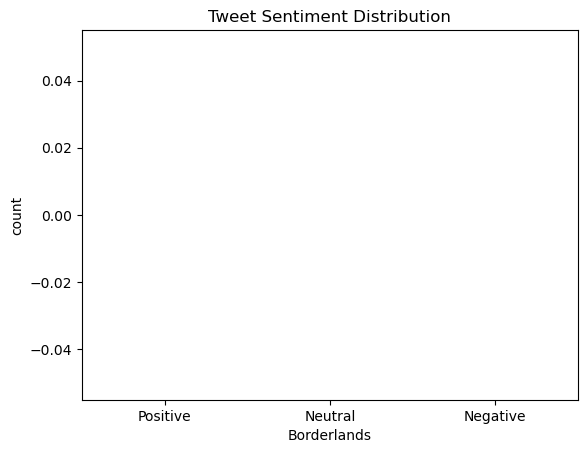

In [18]:
sns.countplot(data=df, x='Borderlands', order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title("Tweet Sentiment Distribution")
plt.show()


In [23]:
def show_wordcloud(data, title):
    # Check if data is empty before processing
    if len(data) == 0:
        print(f"No data available for {title}")
        return
    
    # Join the text data and check if it's empty
    text = ' '.join(data)
    if not text.strip():
        print(f"No text content available for {title}")
        return
    
    # Generate wordcloud if text is available
    wordcloud = WordCloud(background_color='white', max_words=200).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Check if the filtered dataframes have any data before creating wordclouds
for sentiment in ['Positive', 'Negative', 'Neutral']:
    filtered_df = df[df['Borderlands'] == sentiment]
    
    # Check if filtered dataframe is empty
    if filtered_df.empty:
        print(f"No {sentiment} tweets found")
        continue
    
    # Check if '2401' column exists
    if '2401' not in filtered_df.columns:
        print(f"Column '2401' not found in {sentiment} tweets")
        continue
    
    # Filter out NaN values
    text_data = filtered_df['2401'].dropna()
    
    # Create wordcloud
    show_wordcloud(text_data, f"{sentiment} Tweets WordCloud")

No Positive tweets found
No Negative tweets found
No Neutral tweets found


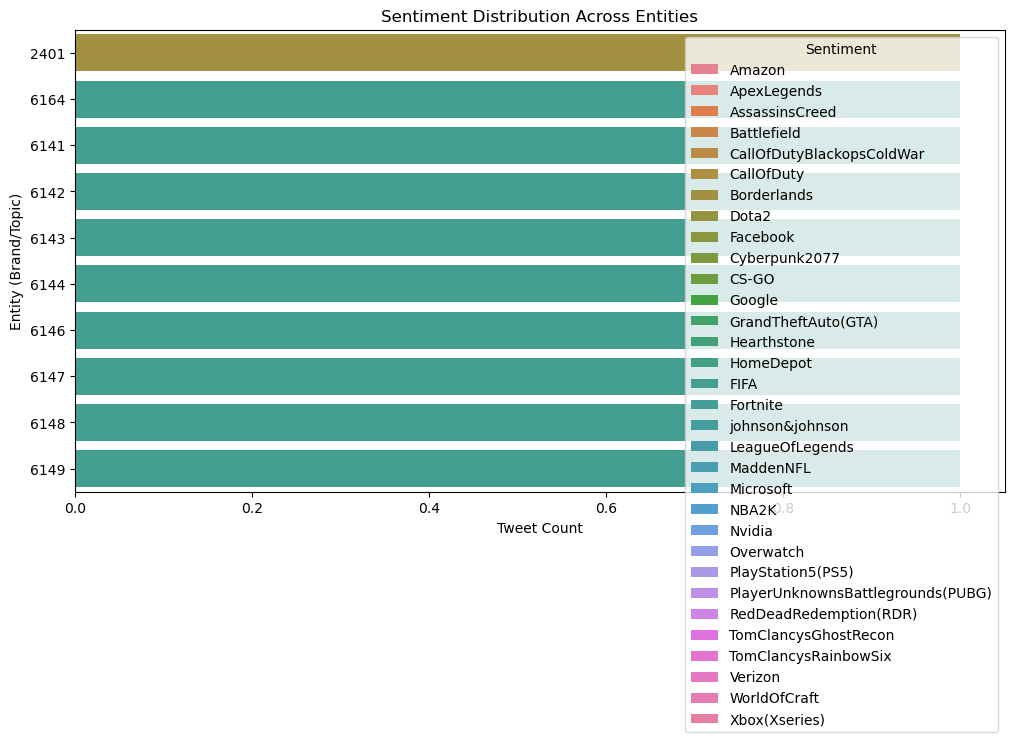

In [25]:
# Top 10 entities by sentiment
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='2401', hue='Borderlands', order=df['2401'].value_counts().index[:10])
plt.title("Sentiment Distribution Across Entities")
plt.xlabel("Tweet Count")
plt.ylabel("Entity (Brand/Topic)")
plt.legend(title='Sentiment')
plt.show()
